In [1]:
import cv2

src1 = cv2.imread('/home/megu/ECoG_CNNs/Result/MK18_expt.0/original_image.png')
src2 = cv2.imread('/home/megu/ECoG_CNNs/Result/MK18_expt.0/smoothGrad.png')

dst = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)

cv2.imwrite('/home/megu/ECoG_CNNs/Result/MK18_expt.0/opencv_add_weighted.jpg', dst)

True

In [2]:
import numpy as np
from PIL import Image

src1 = np.array(Image.open('/home/megu/ECoG_CNNs/motoImage.png'))
src2 = np.array(Image.open('/home/megu/ECoG_CNNs/smoothGrad_testimage.png'))

print(src1.dtype)
# uint8

dst = src1 * 0.5 + src2 * 0.5

print(dst.dtype)
# float64

Image.fromarray(dst.astype(np.uint8)).save('home/megu/ECoG_CNNs/numpy_image_alpha_blend.jpg')

uint8


ValueError: operands could not be broadcast together with shapes (224,224,4) (224,224) 

In [1]:
from pathlib import Path

import numpy as np
from PIL import Image

import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as datasets

class MyDataset(data.Dataset):
    def __init__(self, dir_path, input_size):
        super().__init__()

        self.dir_path = dir_path
        self.input_size = input_size

        self.image_paths = [str(p) for p in Path(self.dir_path).glob("**/*.png")]
        self.len = len(self.image_paths)

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        p = self.image_paths[index]

        # 入力
        image = Image.open(p)
        image = image.resize(self.input_size)
        image = np.array(image)
        image = np.transpose(image, (2, 0, 1))
        image = torch.from_numpy(image).float()

        # ラベル (0: EyesClosed, 1: Anesthetized)
        label = p.split("/")[6]     #ここはpath名が変わると変更することになるので、いつかうまい具合に書き換える
        label = 1 if label == "Anesthetized" else 0

        return image, label

def pytorch_book(data_dir):
    test_transform = transforms.Compose([
        transforms.Resize(224),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        #transforms.Normalize(0.5, 0.5)
    ])

    # 訓練データ用: 正規化に追加で反転とRandomErasingを実施
    train_transform = transforms.Compose([
        transforms.Resize(224),
        #transforms.RandomResizedCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize(0.5, 0.5),
        #transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
    ])


    # ツリーのベースディレクトリ
    #data_dir = '/home/megu/CNN_Dataset/MK3_expt.1'

    # 訓練データディレクトリと検証データディレクトリの指定
    import os
    train_dir = os.path.join(data_dir, 'train')
    test_dir = os.path.join(data_dir, 'test')

    # join関数の結果確認
    print(train_dir, test_dir)

    # 分類先クラスのリスト作成
    classes = ['EyesClosed', 'Anesthetized']

    trainval_dataset = datasets.ImageFolder(train_dir,
                        transform=train_transform)

    return trainval_dataset

In [5]:
debug_dataset = pytorch_book('/home/megu/CNN_Dataset/MK3_expt.1')

/home/megu/CNN_Dataset/MK3_expt.1/train /home/megu/CNN_Dataset/MK3_expt.1/test


In [6]:
# データ件数確認

print(f'訓練データ: {len(debug_dataset)}件')
#print(f'検証データ: {len(test_data)}件')

訓練データ: 6028件


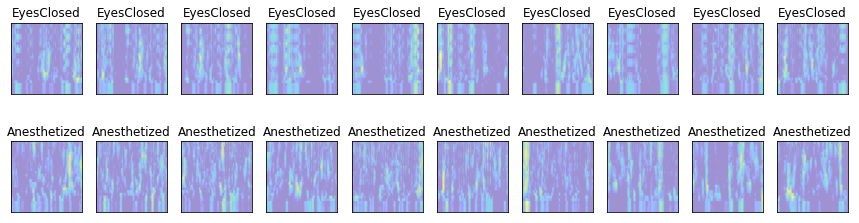

In [7]:
# 検証データ　
# 最初の10個と最後の10個の表示
import matplotlib.pyplot as plt

classes = ['EyesClosed', 'Anesthetized']

plt.figure(figsize=(15, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    image, label = debug_dataset[i]
    img = (np.transpose(image.numpy(), (1, 2, 0)) + 1)/2
    plt.imshow(img)
    ax.set_title(classes[label])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 10, i + 11)
    image, label = debug_dataset[-i-1]
    img = (np.transpose(image.numpy(), (1, 2, 0)) + 1)/2
    plt.imshow(img)
    ax.set_title(classes[label])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()